# 读取shp文件
### 通过 geoPandas 读取 shp 文件，同时能够逐个显示出来
* 注意这里的 shp 导出的时候，尽量将所有的列名称设置为英文，否则不方便读取

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
all_shp = gpd.read_file('shp_file/村1地_全区.shp')
all_shp

,NAME,LAYER,周长,闭合面积,geometry
0,地2,Unknown Area Type,315.38 m,0.001833 sq km,"POLYGON ((440418.558 4397401.724, 440417.610 4..."
1,地3,Unknown Area Type,182.65 m,0.001528 sq km,"POLYGON ((440474.831 4397334.155, 440478.927 4..."
2,地4,Unknown Area Type,247.41 m,0.00125 sq km,"POLYGON ((440474.817 4397610.019, 440472.273 4..."
3,地5,Unknown Area Type,143.98 m,0.000743 sq km,"POLYGON ((440447.944 4397798.362, 440450.065 4..."
4,地6,Unknown Area Type,120.25 m,0.000631 sq km,"POLYGON ((440356.297 4397769.085, 440352.789 4..."
5,地7,Unknown Area Type,147.18 m,0.001222 sq km,"POLYGON ((440320.626 4397779.036, 440315.732 4..."
6,地1_区,Unknown Area Type,442.09 m,0.004246 sq km,"POLYGON ((440419.972 4397404.495, 440410.855 4..."


<Axes: >

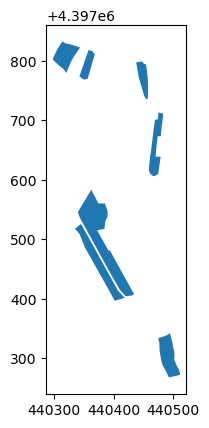

In [17]:
# 仅显示前三行并显示plot
all_shp.plot()

/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/outianyi/miniforge3/envs/pytorch_env/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot 

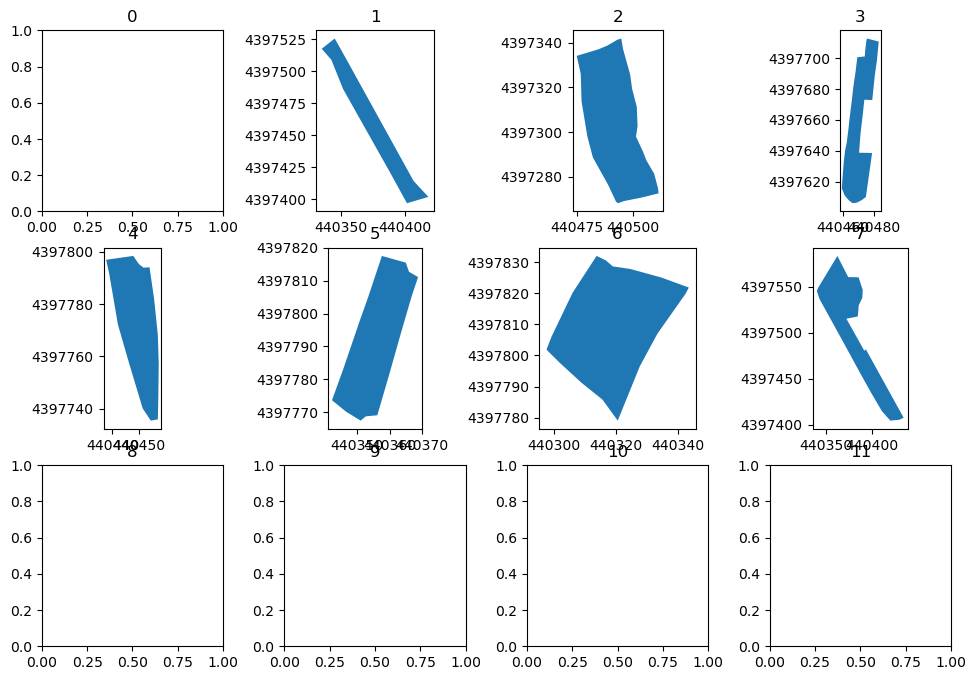

In [18]:
# 分别显示12 个图，不要按照科学显示法显示坐标轴数字
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    all_shp.iloc[i-1:i].plot(ax=ax)
    ax.set_title(i)
    ax.ticklabel_format(useOffset=False, style='plain')

In [19]:
type(all_shp.iloc[0].geometry)

shapely.geometry.polygon.Polygon

In [20]:
all_shp.head(1)

,NAME,LAYER,周长,闭合面积,geometry
0,地2,Unknown Area Type,315.38 m,0.001833 sq km,"POLYGON ((440418.558 4397401.724, 440417.610 4..."


In [21]:
# 更改名称，将‘周长’和‘闭合面积’改为英文版本
all_shp.rename(columns={'周长':'perimeter', '闭合面积':'area'}, inplace=True)
all_shp.head(1)

,NAME,LAYER,perimeter,area,geometry
0,地2,Unknown Area Type,315.38 m,0.001833 sq km,"POLYGON ((440418.558 4397401.724, 440417.610 4..."


In [22]:
# 保存all_shp 中的第二个为单独的shp文件
all_shp.iloc[1:2].to_file('shp_file/村地1地1_旧_第二个.shp')

<Axes: >

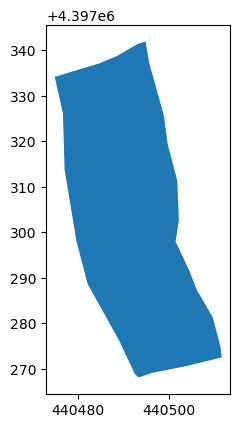

In [23]:
# reload
all_shp2 = gpd.read_file('shp_file/村地1地1_旧_第二个.shp')
all_shp2.plot()

In [24]:
# 仅显示外轮廓
a = all_shp2.iloc[0].geometry.exterior

In [25]:
all_shp2.crs

<Projected CRS: EPSG:32651>
Name: WGS 84 / UTM zone 51N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°E and 126°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Japan. North Korea. Philippines. Russian Federation. South Korea. Taiwan.
- bounds: (120.0, 0.0, 126.0, 84.0)
Coordinate Operation:
- name: UTM zone 51N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

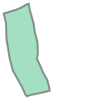

In [26]:
all_shp2.geometry[0]

### 尝试读取 shp 中的每一个区域数据

In [27]:
shp_path = 'shp_file/村1地_全区.shp'
shp_df = gpd.read_file(shp_path)
shp_df

,NAME,LAYER,周长,闭合面积,geometry
0,地2,Unknown Area Type,315.38 m,0.001833 sq km,"POLYGON ((440418.558 4397401.724, 440417.610 4..."
1,地3,Unknown Area Type,182.65 m,0.001528 sq km,"POLYGON ((440474.831 4397334.155, 440478.927 4..."
2,地4,Unknown Area Type,247.41 m,0.00125 sq km,"POLYGON ((440474.817 4397610.019, 440472.273 4..."
3,地5,Unknown Area Type,143.98 m,0.000743 sq km,"POLYGON ((440447.944 4397798.362, 440450.065 4..."
4,地6,Unknown Area Type,120.25 m,0.000631 sq km,"POLYGON ((440356.297 4397769.085, 440352.789 4..."
5,地7,Unknown Area Type,147.18 m,0.001222 sq km,"POLYGON ((440320.626 4397779.036, 440315.732 4..."
6,地1_区,Unknown Area Type,442.09 m,0.004246 sq km,"POLYGON ((440419.972 4397404.495, 440410.855 4..."


<Axes: >

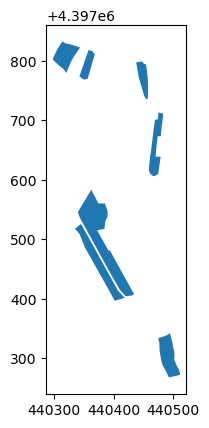

In [28]:
shp_df.plot()